<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula06a_mlp_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

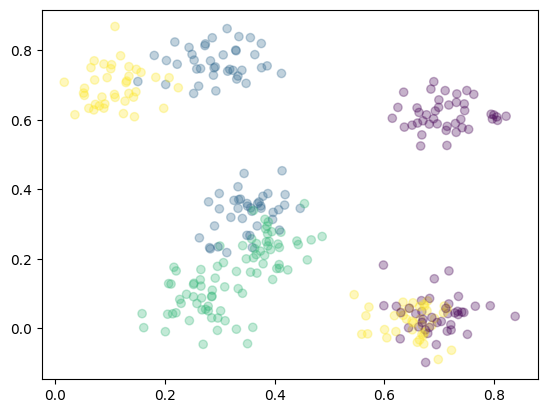

In [22]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def make_dataset(n=400, n_classes=4):
  X, y = make_blobs(n_samples=n,
                    centers=n_classes*2,
                    center_box=(0,1),
                    cluster_std=0.05)
  y = y % n_classes
  return X, y

X, y = make_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

def plot_dataset(X, y):
  plt.scatter(X[:,0], X[:,1], c=y, alpha=0.3)

plot_dataset(X_train, y_train)
plt.show()

In [13]:
def define_axes(X):
    offset = 0.5
    min1, max1 = X[:, 0].min(), X[:, 0].max()
    min2, max2 = X[:, 1].min(), X[:, 1].max()
    return [min1-offset, max1+offset, min2-offset, max2+offset]

def plot_predictions(clf, X):
    axes = define_axes(X)
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

In [24]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(max_iter=2000)
model.fit(X_train, y_train)
ypred = model.predict(X_train)
print("train:", accuracy_score(y_train, ypred))
y_pred = model.predict(X_test)
print("test:", accuracy_score(y_test, y_pred))

train: 0.865625
test: 0.925


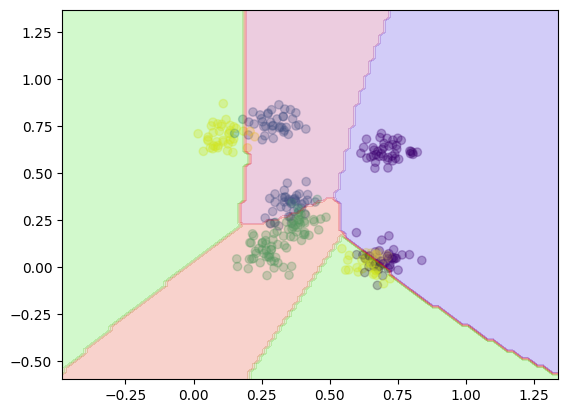

In [25]:
plot_dataset(X_train, y_train)
plot_predictions(model, X_train)
plt.show()

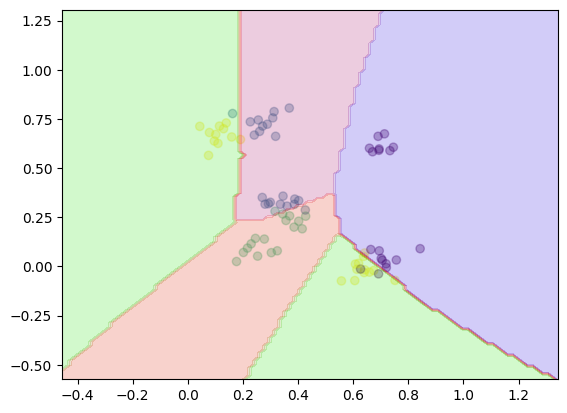

In [26]:
plot_dataset(X_test, y_test)
plot_predictions(model, X_test)
plt.show()